# Task 1: Approximating functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load linear data set (A)
linear_data = np.loadtxt(fname="linear_function_data.txt")
print('Shape of the linear data set: '+str(np.shape(linear_data)))
# load nonlinear data set (B)
nonlinear_data = np.loadtxt(fname="nonlinear_function_data.txt")
print('Shape of the nonlinear data set: '+str(np.shape(nonlinear_data)))

Shape of the linear data set: (1000, 2)
Shape of the nonlinear data set: (1000, 2)


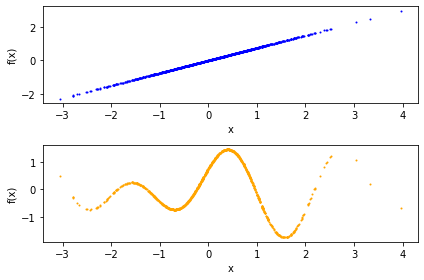

In [3]:
# plot both data sets
fig, axs = plt.subplots(2,1)
axs[0].scatter(linear_data[:,0], linear_data[:,1], c='blue', s=1, alpha=1)
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[1].scatter(nonlinear_data[:,0], nonlinear_data[:,1], c='orange', s=1, alpha=1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
fig.tight_layout()
plt.show()

### First part: Approximate (A) with a linear function

MSE: 0.000000000106116795


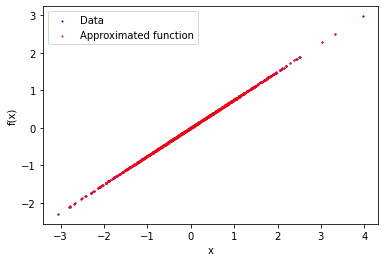

In [4]:
# Extract X and F from the data set
X = linear_data[:,0].reshape(-1,1)# reshape to get (1000, 1) instead of (1000,)
F = linear_data[:,1].reshape(-1,1)

# compute A using closed form solution to minimze least squares error
# due to the dimension of X and F, A will have dimension (1,1) i.e. a scalar
AT_o = 1/(X.T @ X) @ X.T @ F # own
AT_l, _, _, _ = np.linalg.lstsq(X, F, rcond=None) # library
assert np.allclose(AT_o,AT_l), 'Difference between A calculated by np.linalg.lstqs and own calculation is too big'

# use library-calculated A to obtain function values for the linear function
linear_func = X @ AT_l

# print mean squared error between data and approximated function values
MSE_A_lin = np.mean((F - linear_func)**2)
print('MSE: %.18f' %(MSE_A_lin))

# plot function over data set
plt.scatter(X, F, c='blue', s=1, alpha=1, label='Data')
plt.scatter(X, linear_func, c='red', s=1, alpha=1, label='Approximated function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Second part: Approximate (B) with a linear function

MSE: 0.774891987901224599


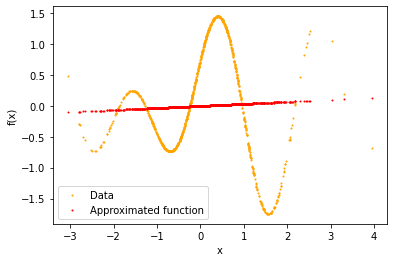

In [5]:
# Extract X and F from the data set
X = nonlinear_data[:,0].reshape(-1,1)# reshape to get (1000, 1) instead of (1000,)
F = nonlinear_data[:,1].reshape(-1,1)

# compute A using closed form solution to minimze least squares error
# due to the dimension of X and F, A will have dimension (1,1) i.e. a scalar
AT_o = 1/(X.T @ X) @ X.T @ F # own
AT_l, _, _, _ = np.linalg.lstsq(X, F, rcond=None) # library
assert np.allclose(AT_o,AT_l), 'Difference between A calculated by np.linalg.lstqs and own calculation is too big'

# use library-calculated A to obtain function values for the linear function
linear_func = X @ AT_l

# print mean squared error between data and approximated function
MSE_B_lin = np.mean((F - linear_func)**2)
print('MSE: %.18f' %(MSE_B_lin))

# plot function over data set
plt.scatter(X, F, c='orange', s=1, alpha=1, label='Data')
plt.scatter(X, linear_func, c='red', s=1, alpha=1, label='Approximated function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

### Third part: Approximate (B) with radial basis functions

In [6]:
def phi_xl(x, x_l, eps):
    '''
    Computes the value of radial basisfunction for x with given supporting point x_l
    --
    returns scalar value
    --
    Parameters:
        x: data point n-dim
        x_l: supporting point n-dim
        eps: parameter for the radial basis function
    '''
    assert np.shape(x) == np.shape(x_l), 'Shapes mismatch '+str(np.shape(x))+' and '+str(np.shape(x_l))
    distance = np.linalg.norm((x_l - x), 2)**2
    value = -distance/eps**2
    return np.exp(value)

In [7]:
def supporting_points(L, X):
    '''
    Selects L equally distributed supporting points out of X
    --
    returns array of length L
    --
    Parameters:
        L: number of supporting points
        X: array of data points
    '''
    N = np.shape(X)[0]
    d = N/L # 'index distance' between neighbouring supporting points
    sup_points = np.empty((L, np.shape(X)[1]))
    for l in range(L):
        sup_points[l] = X[round(l*d),:]
    return sup_points

In [8]:
def rbf(X, L, eps):
    '''
    Computes the values of the radial basis functions for given data points and number of supporting points
    --
    returns matrix Phi containing the rbf value for each pair of data point and supporting point
    --
    Parameters:
        X: data points
        L: number of suppoting points
        eps: parameter for the radial basis function
    '''
    N = np.shape(X)[0]
    assert 1 <= L <= N, 'L out of range'
    Phi = np.empty((N, L))
    sup_points = supporting_points(L,X)
    for n in range(N):
        for sp in range(len(sup_points)):
            Phi[n,sp] = phi_xl(X[n,:].reshape(1,-1), [sup_points[sp]], eps)
    return Phi

In [9]:
eps = 1
N = np.shape(X)[0]
L = int(N/64)
Phi = rbf(X, L, eps)
print('Shape of Phi = (N, L) = '+str(np.shape(Phi)))

Shape of Phi = (N, L) = (1000, 15)


MSE: 0.000583081005616372


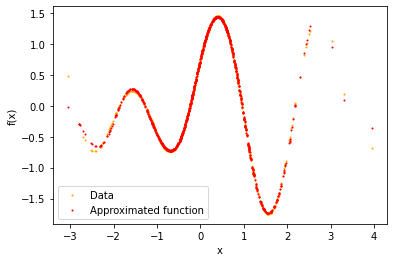

In [10]:
# Extract X and F from the data set - not necessary here, because they are weren't changed after second part
#X = nonlinear_data[:,0].reshape(-1,1)# reshape to get (1000, 1) instead of (1000,)
#F = nonlinear_data[:,1].reshape(-1,1)

# computes C using closed form solution to minimze least squares error
CT, _, _, _ = np.linalg.lstsq(Phi, F, rcond=None)

# calculate function values for the nonlinear function 
nonlinear_func = Phi @ CT

# print mean squared error between data and approximated function
MSE_B_RBF = np.mean((F - nonlinear_func)**2)
print('MSE: %.18f' %(MSE_B_RBF))

# plot function over data set
plt.scatter(X, F, c='orange', s=1, alpha=1, label='Data')
plt.scatter(X, nonlinear_func, c='red', s=1, alpha=1, label='Approximated function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [11]:
print('Comparison of mean squared error for data set (B):')
print('MSE with linear function: %.18f' %(MSE_B_lin))
print('MSE with nonlinear function (RBF): %.18f' %(MSE_B_RBF))
print('Difference of MSEs: %.18f' %(abs(MSE_B_lin - MSE_B_RBF)))

Comparison of mean squared error for data set (B):
MSE with linear function: 0.774891987901224599
MSE with nonlinear function (RBF): 0.000583081005616372
Difference of MSEs: 0.774308906895608273


Why did you chose $\epsilon$ this way?\
For the given data set, $\epsilon = 1$ allows to get a nice approximation with only a few supporting points. Less supporting points are good, because this needs less computation time and improves the generalization behavior.

Why is it not a good idea to use radial basis functions for data set (A)?\
Because the computation time is significantly larger with radial basis functions. When using every data point as a supporting point, the mean squared error is slightly lower for RBFs compared to the linear approximation. But the improvment is so small $(2*10^{-12}$, see below$)$ that it's not worth the additional effort. Furthermore the generalization behavior will be very bad, if a lot of supporting points are used.

Shape of Phi = (N, L) = (1000, 1000)
MSE: 0.000000000103373586


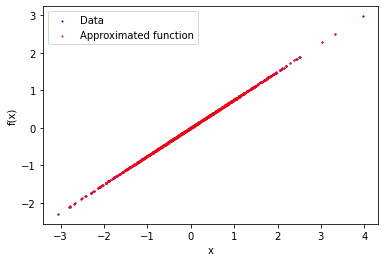

In [12]:
# Extract X and F from the data set
X = linear_data[:,0].reshape(-1,1)# reshape to get (1000, 1) instead of (1000,)
F = linear_data[:,1].reshape(-1,1)

# compute Phi
eps = 1
N = np.shape(X)[0]
L = int(N)# if L is set to N, it takes some time to compute Phi
Phi = rbf(X, L, eps)
print('Shape of Phi = (N, L) = '+str(np.shape(Phi)))

# compute A using closed form solution to minimze least squares error
CT, _, _, _ = np.linalg.lstsq(Phi, F, rcond=None)

# calculate function values for the linear function
nonlinear_func = Phi @ CT

# print mean squared error between data and approximated function values
MSE_A_RBF = np.mean((F - nonlinear_func)**2)
print('MSE: %.18f' %(MSE_A_RBF))

# plot function over data set
plt.scatter(X, F, c='blue', s=1, alpha=1, label='Data')
plt.scatter(X, nonlinear_func, c='red', s=1, alpha=1, label='Approximated function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In [13]:
print('Comparison of mean squared error for data set (A):')
print('MSE with linear function: %.18f' %(MSE_A_lin))
print('MSE with nonlinear function (RBF): %.18f' %(MSE_A_RBF))
print('Difference of MSEs: %.18f' %(abs(MSE_A_lin - MSE_A_RBF)))

Comparison of mean squared error for data set (A):
MSE with linear function: 0.000000000106116795
MSE with nonlinear function (RBF): 0.000000000103373586
Difference of MSEs: 0.000000000002743209
